# Prototyping of the theoretical concept

The prototyping procedure is based on the phases of the CRISP-DM process model. The two phases Business Understanding and Deployment are not considered for the practical implementation, as these contain tasks of operational practice. Thus, they are not relevant for the demonstration of the functions. <br>
The use cases are assigned to the phases Data Understanding, Data Preperation, Modeling and Evaluation.

## Data Understanding
**UC02 - Load Data Set**
**UC03 - Describe Data Set**
**UC04 - Visualise Data**

In [1]:
# for dealing with large datasets
import pandas as pd
# for processing multidimensional arrays
import numpy as np
# for importing functions from another notebook
import import_ipynb
# notebook with the logic for data generation
import Data_Generator

# show all visual outputs directly in the Jupyter notebook
%matplotlib inline

importing Jupyter notebook from Data_Generator.ipynb


In [2]:
from sklearn.utils import shuffle

# shuffle generated data and load it into a data frame
df = shuffle(Data_Generator.generate_data_set(5000))
# show first five entries of the shuffled data frame
df.head()

,Duration,Region,Km,Stops,Weather Extreme,Traffic
748,3.02301,1,0.416239,4,snow,60.9811
605,4.88387,2,7.00585,18,snow,30.7086
1189,6.91184,5,17.4632,137,none,74.7475
1499,2.52845,2,7.00703,16,rain,13.5589
4370,5.59541,4,17.3856,84,snow,29.5525


To get a better understanding of the data, a description of the data set is given. For each column with numerical values, the following properties are calculated and displayed: <br>
* Number of entries 
* mean value
* Standard deviation 
* Smallest value
* 25% percentile 
* Median
* 75% percentile
* Largest value

In [3]:
# convert numeric columns for description
df['Duration'] = pd.to_numeric(df['Duration'])
df['Region'] = pd.to_numeric(df['Region'])
df['Km'] = pd.to_numeric(df['Km'])
df['Stops'] = pd.to_numeric(df['Stops'])
df['Traffic'] = pd.to_numeric(df['Traffic'])

# describe for each numerical column:
# number of entries,
# number of unique values, 
# standard deviation,
# min, max value
# lower percentile, upper percentile 
# median
df.describe()

,Duration,Region,Km,Stops,Traffic
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,4.733119,2.989800,10.873263,61.758400,49.720858
std,1.655768,1.414247,5.749617,40.979013,28.926476
min,0.666011,1.000000,0.000999,1.000000,0.029425
25%,3.429913,2.000000,5.695210,20.000000,24.665166
50%,4.748172,3.000000,11.207477,59.000000,48.991354
75%,5.977002,4.000000,15.894119,99.000000,74.951054
max,8.901991,5.000000,19.999434,140.000000,99.993717


For columns with non-numeric values, the following is calculated and displayed:
* Number of entries 
* number of unique values
* most frequent value
* Frequency of the most frequent value

In [4]:
# describe for non numerical column:
# number of entries,
# number of unique values
# most common value
# most common value frequency
df.describe(include=[np.object])

,Weather Extreme
count,5000
unique,3
top,rain
freq,1692


In order to gain insight into the distribution and the relationship between the data, it is useful to visualise the data set. For this purpose, the relationships of the individual pairs of characteristics are displayed in a scatter plot matrix.

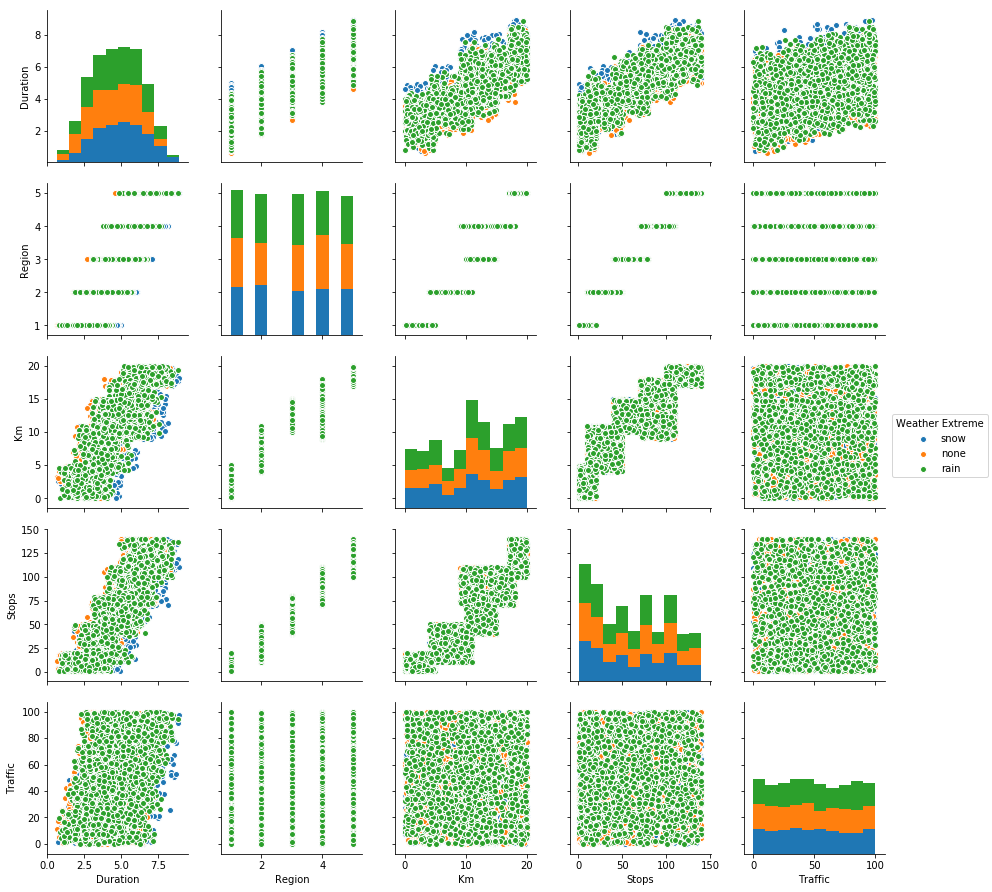

In [5]:
import seaborn as sns

# visualize a scatter plot matrix
# different colors stands for weather values
splom = sns.pairplot(df, hue = "Weather Extreme")

## Data Preperation
* **UC05 - Transform data**

For non-numeric values, a single attribute transformation must be performed so that the learning algorithms can include them in the calculation. In the case of generated data, this only needs to be done for weather.

In [6]:
# transformate non numerical attributes for the learing algorithms 
df = pd.get_dummies(df, columns = ["Weather Extreme"])
# show first five entries of the preperated data frame
df.head()

,Duration,Region,Km,Stops,Traffic,Weather Extreme_none,Weather Extreme_rain,Weather Extreme_snow
748,3.023007,1,0.416239,4,60.981072,0,0,1
605,4.883871,2,7.005855,18,30.708593,0,0,1
1189,6.911838,5,17.463206,137,74.747481,1,0,0
1499,2.528454,2,7.007028,16,13.558867,0,1,0
4370,5.595414,4,17.385562,84,29.552548,0,0,1


## Modeling
* **UC06 - Create Test Design**
* **UC07 - Calibrate Hyperparameters**
* **UC08 - Visualise validation curves**
* **UC09 - Train Models**
* **UC10 - Calculate training times**
* **UC11 - Visualise training times**
* **UC12 - Visualise decision tree**

Zunächst wird definiert, welcher Wert vorhergesagt werden soll und welche Prädikatoren dafür verwendet werden. 

In [7]:
# define label --> target value, which should be predicted
y = df["Duration"]
# define features/ variables for predicting the label
X = df.drop(["Duration"], axis = 1)

In the following step, a test design is created. For this purpose, the data is divided into training and test data. To test the prediction quality, the models are trained with the training data and tested with the test data. <br>
In order to obtain more representative results about the quality, a 10-fold cross validation is performed.

In [8]:
# create a test design
from sklearn.model_selection import train_test_split

# split data into train and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# 10-fold cross validation to get more representative test results
kf = KFold(n_splits = 10)

Four regression algorithms are used to learn the relationships between the data:
* Linear Regression
* Bayesian Regression
* Support Vector Regression
* Decision Tree Regression

In [9]:
# load algorithms from scikit learn libary
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

# initialize models
lr = LinearRegression()
br = BayesianRidge()
svr = SVR()
dtr =  DecisionTreeRegressor()

# define model names
model_names = (
    'Lineare Regression',
    'Bayesian Regression',
    'Support Vector Regression',
    'Decision Tree Regression'
)

# function to get the name of a model for printing
# @param model_var: model for which the name is searched
# @return switcher.get(): name of the model
def get_model_name(model_var):
    switcher = {
        lr:model_names[0],
        br:model_names[1],
        svr:model_names[2],
        dtr:model_names[3]
    }
    return switcher.get(model_var, "Invalide model")

For Support Vector Regression and Decision Tree Regression, the hyperparameters are calibrated to optimal values. For the other two methods, optimisation is omitted due to the lower complexity of the algorithms. Changing the parameters would have little to no effect on the result. <br>

In order to understand the process of finding an optimal value for a hyperparameter, the following function is used to visualise the validation curve.

In [10]:
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt

# function to visualize the validation curve for hyperparameters
# @param model: model with the hyperparameter
# @param param: hyperparameter which should be optimized
# @param param_range: values for the hyperparameter
def draw_val_curve(model, param, param_range):
    # calculate validation curves
    train_scores, test_scores = validation_curve(
        model,
        X,
        y,
        param_name = param,
        param_range = param_range
    )
    
    # print train score for each parameter value in the range  
    print("Train Scores: " + str(np.mean(train_scores, axis = 1)))
    # print test score for each parameter value in the range
    print("Test Scores: " + str(np.mean(test_scores, axis = 1)))
          
    # set title of the diagram
    plt.title(param + '-Validierung')
    # label y axis
    plt.ylabel('Genauigkeit')
    # label x axis
    plt.xlabel('Parameter Werte')
    
    # draw curve of average training scores for each value in the range
    plt.plot(param_range, np.mean(train_scores, axis = 1), color = 'black', label = 'Training Data')
    # draw curve of average test scores for each value in the range
    plt.plot(param_range, np.mean(test_scores, axis = 1), linestyle='dashed', color = 'black', label = 'Test Data')
    # draw a legend for the both curves
    plt.legend()
    # show graph
    plt.show()

The next function implements a grid search to empirically find the optimal values for the hyperparameters of the support vector regression.

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import GridSearchCV

# function to optimize the hyperparameters of a Support Vector Regression model
# using a GridSearch to find the best values
# @param svr_model: Support Vector Regression model which should be optimized
def find_best_svr_params(svr_model):
    # create a pipeline with standardized features and the model
    pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("svr", svr_model)
    ])

    # GridSearch for the pipeline with the hyperparameters and the values for them
    gsCV = GridSearchCV(pipeline, param_grid = {
        "svr__C": [0.1, 0.5, 1.0, 1.5, 2.0, 2.5],
        "svr__epsilon": [0.0, 0.5, 1.0, 1.5, 2.0],
        "svr__kernel": ['rbf','linear']
    })   

    # fit the data to the GridSearch as a model
    gsCV.fit(X,y) 

    # print best values for the hyperparameters
    print("Bester Wert für SVR-Hyperparameter: " + str(gsCV.best_params_))
    
    # set best values as parameters for the Support Vector Regression model
    svr_model.C = gsCV.best_params_["svr__C"]
    svr_model.epsilon = gsCV.best_params_["svr__epsilon"]
    svr_model.kernel = gsCV.best_params_["svr__kernel"]

In [12]:
# call function to find the best values for the hyperparameters
find_best_svr_params(svr)

Bester Wert für SVR-Hyperparameter: {'svr__C': 0.5, 'svr__epsilon': 0.5, 'svr__kernel': 'linear'}


A validation curve is created for the C, epsilon and kernel parameters. <br>

The lower the accuracy values on the y-axis, the higher the bias. If the bias is high, the correlations in the data could not be detected and therefore the prediction performance decreases. In this case, we speak of an underfitting of the model. <br>
The further the curves for the training and test results diverge, the higher the variance. In this case, the model has become too complex, which is why it has adapted too much to the training data.

Train Scores: [0.30395161 0.82048618 0.93848405 0.97071407 0.9833331  0.9887179 ]
Test Scores: [0.22110905 0.62930552 0.72424857 0.74483858 0.75025223 0.75089575]


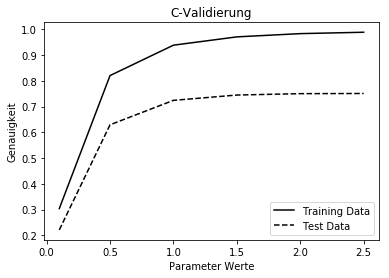

Train Scores: [0.93998767 0.89029361 0.75938832 0.58164093 0.38893286]
Test Scores: [0.72682537 0.68251227 0.57651484 0.4386525  0.29272018]


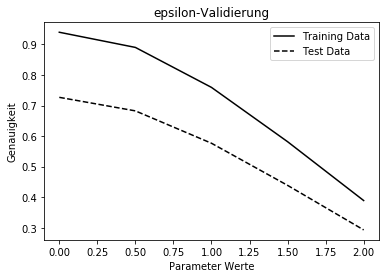

Train Scores: [0.93848405 0.88250788]
Test Scores: [0.72424857 0.8814479 ]


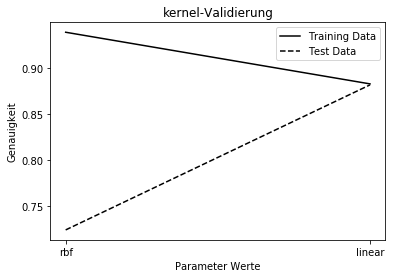

In [13]:
# call function to visualize the validation curve for the hyperparameters
draw_val_curve(SVR(), "C", np.array([0.1, 0.5, 1.0, 1.5, 2.0, 2.5]))
draw_val_curve(SVR(), "epsilon", np.array([0.0, 0.5, 1.0, 1.5, 2.0]))
draw_val_curve(SVR(), "kernel", ['rbf', 'linear'])

For the decision tree regression, optimal values for the hyperparameters are also searched for by grid search.

In [14]:
# function to optimize the hyperparameters of a Decision Tree Regression model
# using a GridSearch to find the best values
# @param dtr_model: Decision Tree Regression model which should be optimized
def find_best_dtr_params(dtr_model):
    # create a pipeline with standardized features and the model
    pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("dtr", dtr)
    ])

    # GridSearch for the pipeline with the hyperparameters and the values for them
    gsCV = GridSearchCV(pipeline, param_grid = {
        "dtr__max_depth": [1, 3, 5, 7, 9],
        "dtr__max_leaf_nodes": [None, 2, 3, 4, 5, 6, 8, 9, 20],
        "dtr__min_weight_fraction_leaf": [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
    })   

    # fit the data to the GridSearch as a model
    gsCV.fit(X,y) 

    # print best values for the hyperparameters
    print("Bester Wert für DTR-Hyperparameter: " + str(gsCV.best_params_))

    # set best values as parameters for the Decision Tree Regression model
    dtr_model.max_depth = gsCV.best_params_["dtr__max_depth"]
    dtr_model.max_leaf_nodes = gsCV.best_params_["dtr__max_leaf_nodes"]
    dtr_model.min_weight_fraction_leaf = gsCV.best_params_["dtr__min_weight_fraction_leaf"]

In [15]:
# call function to find the best values for the hyperparameters
find_best_dtr_params(dtr)

Bester Wert für DTR-Hyperparameter: {'dtr__max_depth': 5, 'dtr__max_leaf_nodes': None, 'dtr__min_weight_fraction_leaf': 0.0}


Train Scores: [0.57027437 0.81563412 0.88488877 0.90523617 0.9301147 ]
Test Scores: [0.56985561 0.80621033 0.87817787 0.87147507 0.8447039 ]


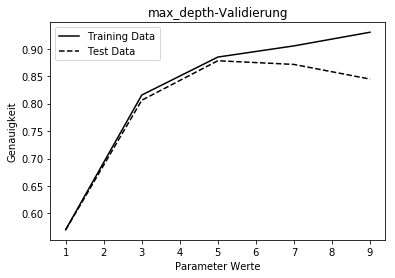

Train Scores: [0.57027437 0.68192662 0.72289963 0.75919747 0.78071769 0.81829682
 0.83514943 0.87502215]
Test Scores: [0.56985561 0.67678316 0.7156529  0.75021855 0.76726782 0.80531751
 0.82838245 0.86672538]


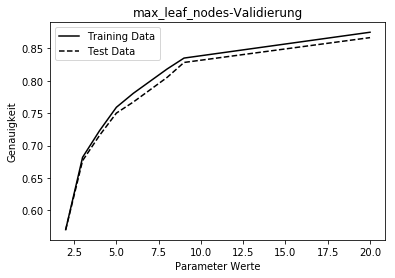

Train Scores: [1.         0.79845681 0.70542333 0.595341   0.5623646  0.15493365]
Test Scores: [0.76960096 0.79084189 0.70222175 0.59381636 0.56674954 0.15880431]


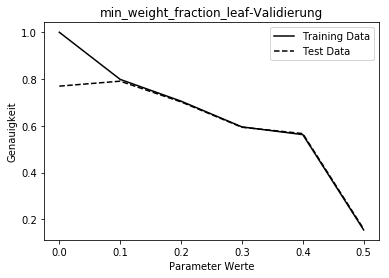

In [16]:
# call function to visualize the validation curve for the hyperparameters
draw_val_curve(DecisionTreeRegressor(), "max_depth", np.array([1, 3, 5, 7, 9]))
draw_val_curve(DecisionTreeRegressor(), "max_leaf_nodes", np.array([2, 3, 4, 5, 6, 8, 9, 20]))
draw_val_curve(DecisionTreeRegressor(), "min_weight_fraction_leaf", np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5]))

The next two functions are for adapting the models to the training data. The times required for training are measured and displayed comparatively in a bar chart.

In [17]:
from timeit import default_timer as timer

# function to calculate the time which a model needs to fit the data
# @param model: model which should be trained
# @return tt: training time 
def calculate_training_time(model):
    # start the measurement of the training time 
    start = timer()
    
    # train the model with the test data 
    model.fit(X_train, y_train)
    
    # stop the measurement of the training time 
    end = timer()
    
    # calculate the time from start to end
    tt = end - start
    
    # print the training time of the model
    print("Trainingszeit der " + get_model_name(model) + ": " + str(tt))
    
    # return the training time 
    return tt

# function to draw a  bar graph of the training times
# @param values: calculated training times of all models
def draw_training_times(values):
    # create a figure
    fig,ax = plt.subplots() 
    
    # set title 
    plt.title('Trainingszeiten')
    # label y axis
    plt.ylabel('t in s') 
    
    # set limits for the y axis
    y_pos = np.arange(len(model_names))
    plt.ylim(0,max(values))
    
    # draw bars
    plt.bar(y_pos, values, align='center', alpha=0.85, color='black')
    
    # print names of the models
    ax.set_xticks(range(len(model_names)))
    ax.set_xticklabels(model_names, rotation='45')

    # show graph
    plt.show()
    
    #plt.savefig('election_presidentielle.png')

Trainingszeit der Lineare Regression: 0.005331403888504012
Trainingszeit der Bayesian Regression: 0.006543459473250076
Trainingszeit der Support Vector Regression: 10.528709310514694
Trainingszeit der Decision Tree Regression: 0.006383902917423967


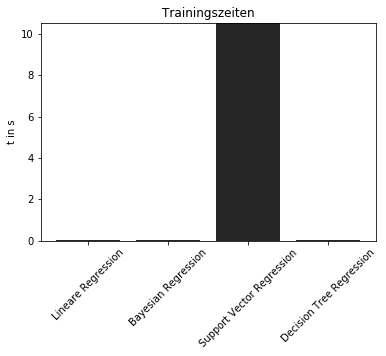

In [18]:
# fit models to the train data and calculate training times
lr_tt = calculate_training_time(lr)
br_tt = calculate_training_time(br)
svr_tt = calculate_training_time(svr)
dtr_tt = calculate_training_time(dtr)

# call function to draw the graph of the training times
draw_training_times([lr_tt, br_tt, svr_tt, dtr_tt])

The advantage of the decision tree is that it is based on a structure and not on an adjustment function. Thus, a prediction can be better understood. For this reason, the generated decision tree is output textually and then graphically.

In [19]:
from sklearn.tree import export_graphviz

# get a viewable structur of the generated decision tree
tree = export_graphviz(dtr, None, feature_names = list(X), rounded = True)

# print decision tree in textual form
print(tree)

digraph Tree {
node [shape=box, style="rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label="Region <= 2.5\nmse = 2.756\nsamples = 3750\nvalue = 4.749"] ;
1 [label="Traffic <= 49.733\nmse = 0.969\nsamples = 1490\nvalue = 3.203"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="Region <= 1.5\nmse = 0.709\nsamples = 786\nvalue = 2.702"] ;
1 -> 2 ;
3 [label="Traffic <= 25.483\nmse = 0.496\nsamples = 414\nvalue = 2.225"] ;
2 -> 3 ;
4 [label="Weather Extreme_snow <= 0.5\nmse = 0.423\nsamples = 227\nvalue = 1.98"] ;
3 -> 4 ;
5 [label="mse = 0.291\nsamples = 144\nvalue = 1.803"] ;
4 -> 5 ;
6 [label="mse = 0.503\nsamples = 83\nvalue = 2.286"] ;
4 -> 6 ;
7 [label="Weather Extreme_snow <= 0.5\nmse = 0.423\nsamples = 187\nvalue = 2.524"] ;
3 -> 7 ;
8 [label="mse = 0.287\nsamples = 121\nvalue = 2.308"] ;
7 -> 8 ;
9 [label="mse = 0.431\nsamples = 66\nvalue = 2.919"] ;
7 -> 9 ;
10 [label="Traffic <= 25.016\nmse = 0.41\nsamples = 372\nvalue = 3.

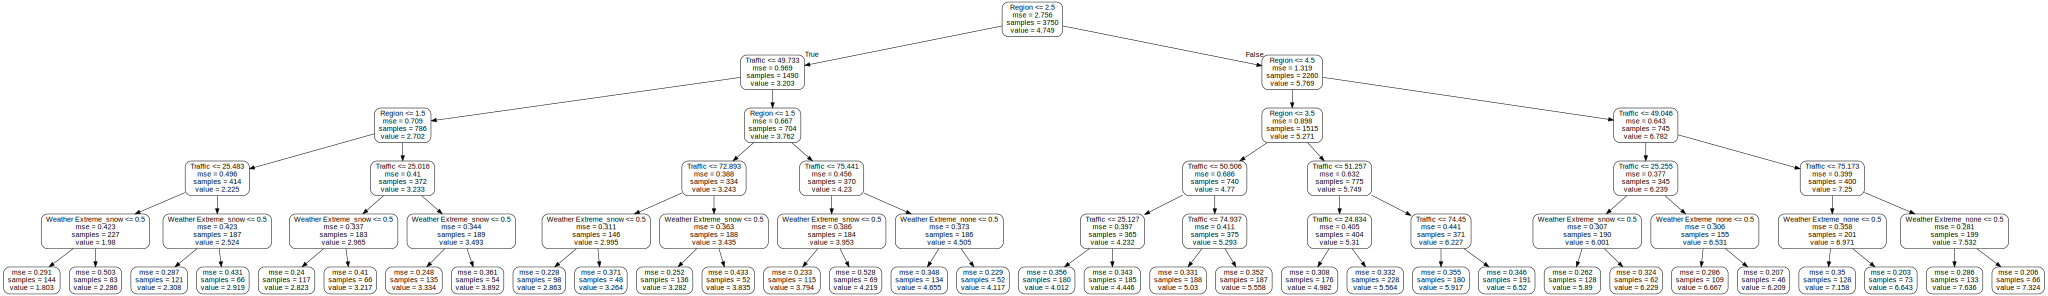

In [20]:
import graphviz

# visualize the decision tree in a picture
graphviz.Source(tree)

# for saving the decision tree as png use the following code
#src = graphviz.Source(tree, format = "png")
#src.render("./dtr")


## Evaluation
* **UC13 - Calculate key figures**
* **UC14 - Visualise results of key figures**
* **UC15 - Visualise learning curves**
* **UC16 - Predict delivery time**

For the evaluation, metrics for quality measurement are implemented in the first step. The key figures R2 (coefficient of determination), mean squared error, root mean squared error and mean absolute error are calculated. The results are then compared for the algorithms in a bar chart.

In [21]:
# function to calculate quality scores
# @param model: model which should be tested
# @param metric: metric to test the model
# @return score: calculated metric score
def evaluate_model(model, metric):
    # print model name
    print(get_model_name(model) + ": ")
    
    # check if the metric is mse, rmse, mae
    # these metrics returns negative values
    # more infos on: https://github.com/scikit-learn/scikit-learn/issues/2439
    if metric.find("neg") == 0:
        # calculate metric score and use 10-fold cross validation
        # reverse sign
        scores = -cross_val_score(model, X, y, cv = kf, scoring = metric)
    else:
        # calculate metric score and use 10-fold cross validation 
        scores = cross_val_score(model, X, y, cv = kf, scoring = metric)
    
    # print the scores from the 10-fold cross validation
    print(scores)
                                  
    # print average score
    score = np.mean(scores)
    print("Durchschnittswert: " + str(score) + '\n')
    
    # return the calculated score
    return score

# function to draw a bar graph of the evaluation results
# @param title: title of the graph
# @param ylabel: label for the y axis
# @param values: calculated evaluation results
def draw_metric_scores(title, ylabel, values):
    # create a figure
    fig,ax = plt.subplots()
    
    # set title
    plt.title(title)
    # label y axis
    plt.ylabel(ylabel)
   
    # set limits for the y axis
    y_pos = np.arange(len(model_names))
    
    # R2 score has another range
    if title == '$R^2$':
        plt.ylim(0, 1)
    else:
        plt.ylim(0,max(values))
        
    # draw bars
    plt.bar(y_pos, values, align='center', alpha=0.85, color='black')
    
    # print names of the models
    ax.set_xticks(range(len(model_names)))
    ax.set_xticklabels(model_names, rotation='45')
   
    # show graph
    plt.show()

Lineare Regression: 
[0.89178162 0.88384268 0.88876922 0.87112199 0.88259623 0.88127299
 0.88051744 0.8660218  0.88635029 0.88533615]
Durchschnittswert: 0.881761041001776

Bayesian Regression: 
[0.8917929  0.88382558 0.88877185 0.87114808 0.88256262 0.8812913
 0.88047586 0.86601397 0.88634832 0.88536966]
Durchschnittswert: 0.8817600128681631

Support Vector Regression: 
[0.89177446 0.88377279 0.88905773 0.87094148 0.88246532 0.88112679
 0.88036395 0.86600492 0.88649673 0.88541188]
Durchschnittswert: 0.8817416059657897

Decision Tree Regression: 
[0.88437261 0.87443689 0.88982932 0.87198771 0.8816606  0.87841812
 0.8781545  0.86967375 0.88453562 0.88660108]
Durchschnittswert: 0.8799670199801364



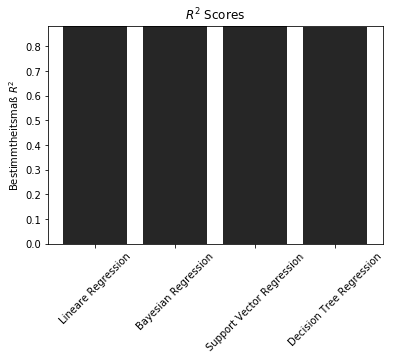

In [22]:
# calculate R2 scores for each model
lr_r2 = evaluate_model(lr,'r2')
br_r2 = evaluate_model(br,'r2')
svr_r2 = evaluate_model(svr,'r2')
dtr_r2 = evaluate_model(dtr,'r2')

# call function to draw the graph of the R^2 scores
draw_metric_scores('$R^2$ Scores', 'Bestimmtheitsmaß $R^2$', [lr_r2, br_r2, svr_r2, dtr_r2])

Lineare Regression: 
[0.29669294 0.31248718 0.31674938 0.33735534 0.32680322 0.30388889
 0.3263859  0.35524349 0.30844964 0.34531923]
Durchschnittswert: 0.32293752040181245

Bayesian Regression: 
[0.29666201 0.3125332  0.31674189 0.33728704 0.32689678 0.30384203
 0.32649948 0.35526426 0.30845499 0.34521831]
Durchschnittswert: 0.32293999907536475

Support Vector Regression: 
[0.29671257 0.31267521 0.31592779 0.33782785 0.32716763 0.30426308
 0.32680516 0.35528825 0.3080522  0.34509114]
Durchschnittswert: 0.32298108864833164

Decision Tree Regression: 
[0.31700559 0.33779072 0.31373057 0.3350892  0.32940761 0.3111961
 0.33284065 0.34556033 0.31337471 0.34150978]
Durchschnittswert: 0.32775052620135503



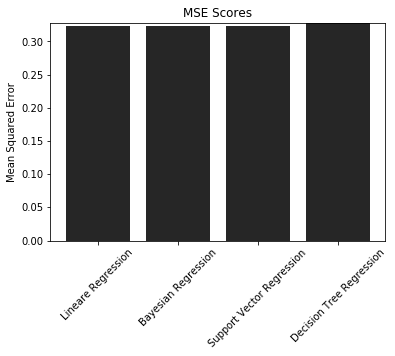

In [23]:
from sklearn.metrics import mean_squared_error
 
# calculate MSE for each model
lr_mse = evaluate_model(lr,'neg_mean_squared_error')
br_mse = evaluate_model(br,'neg_mean_squared_error')
svr_mse = evaluate_model(svr,'neg_mean_squared_error')
dtr_mse = evaluate_model(dtr,'neg_mean_squared_error')

# call function to draw MSEs
draw_metric_scores('MSE Scores', 'Mean Squared Error', [lr_mse, br_mse, svr_mse, dtr_mse])

Lineare Regression: 0.568275919252094
Bayesian Regression: 0.5682781001194439
Support Vector Regression: 0.5683142516674482
Decision Tree Regression: 0.5724950010273933


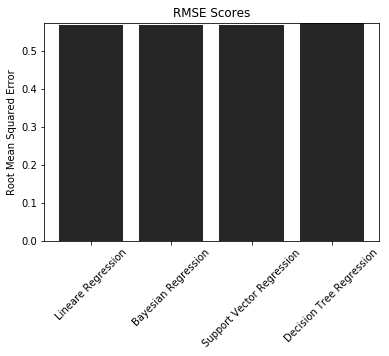

In [24]:
from math import sqrt

# calculate RMSE for each model

lr_rmse = sqrt(lr_mse)
print(model_names[0] + ": " + str(lr_rmse))

br_rmse = sqrt(br_mse)
print(model_names[1] + ": " + str(br_rmse))

svr_rmse = sqrt(svr_mse)
print(model_names[2] + ": " + str(svr_rmse))

dtr_rmse = sqrt(dtr_mse)
print(model_names[3] + ": " + str(dtr_rmse))

# call function to draw RMSEs
draw_metric_scores('RMSE Scores', 'Root Mean Squared Error', [lr_rmse, br_rmse, svr_rmse, dtr_rmse])

Lineare Regression: 
[0.44584123 0.45201215 0.45929059 0.47291796 0.47152452 0.45119916
 0.47257565 0.4951418  0.45417411 0.47639923]
Durchschnittswert: 0.465107640637889

Bayesian Regression: 
[0.44578362 0.45204938 0.45930053 0.47289077 0.47159275 0.45115798
 0.4726433  0.49510938 0.45418421 0.47631023]
Durchschnittswert: 0.4651022146319918

Support Vector Regression: 
[0.44608858 0.45193394 0.45897774 0.47361434 0.47165534 0.45127334
 0.47281252 0.49547078 0.45395833 0.47617687]
Durchschnittswert: 0.4651961767550835

Decision Tree Regression: 
[0.45693481 0.46883068 0.45787209 0.46580865 0.46488028 0.45299965
 0.47260524 0.47748231 0.45575107 0.47635202]
Durchschnittswert: 0.4649516802273914



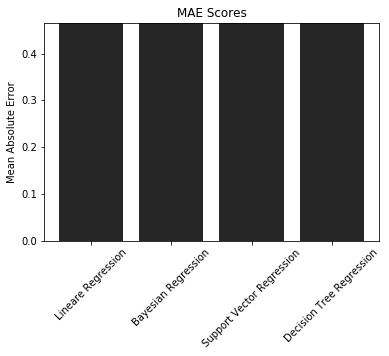

In [25]:
from sklearn.metrics import mean_absolute_error

# calculate MAE for each model
lr_mae = evaluate_model(lr,'neg_mean_absolute_error')
br_mae = evaluate_model(br,'neg_mean_absolute_error')
svr_mae = evaluate_model(svr,'neg_mean_absolute_error')
dtr_mae = evaluate_model(dtr,'neg_mean_absolute_error')

# call function to draw MAEs
draw_metric_scores('MAE Scores', 'Mean Absolute Error', [lr_mae, br_mae, svr_mae, dtr_mae])

In the next step, the learning curves are visualised for all models. The visualisation allows us to estimate for each algorithm how the size of the training set affects the accuracy of the predictions.

In [26]:
from sklearn.model_selection import learning_curve

# function to visualize the learning curve for a model
# @param: model for which the learning curve should be visualized
def draw_learning_curve(model):
    # calculate learning curve
    train_sizes_abs, train_scores, test_scores = learning_curve(model, X, y)
    
    # set title of the diagram
    plt.title('Learning Curve' + '\n' + get_model_name(model))
    # label y axis
    plt.ylabel('Genauigkeit')
    # label x axis
    plt.xlabel('Trainingsgröße')
    
    # draw curve of average training scores for each training size
    plt.plot(train_sizes_abs, np.mean(train_scores, axis = 1), label='Train Data', color='black')
    # draw curve of average test scores for each training size
    plt.plot(train_sizes_abs, np.mean(test_scores, axis = 1), linestyle='dashed', label='Test Data', color='black')
    # draw a legend for the both curves
    plt.legend()
    # show graph
    plt.show()

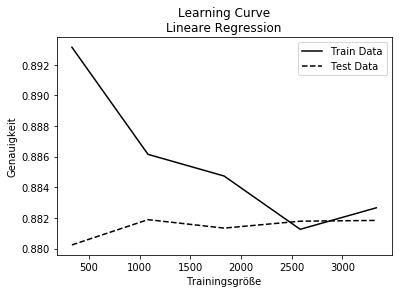

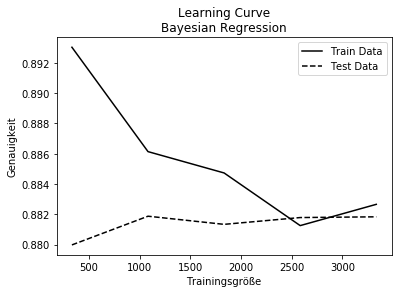

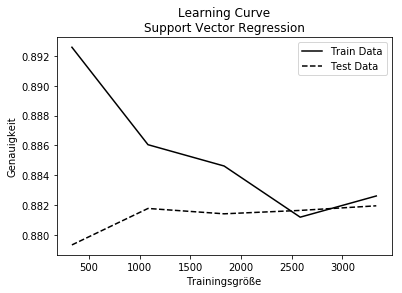

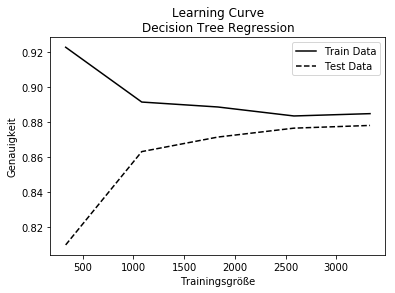

In [27]:
# call function to visualize the learning curve for each model
draw_learning_curve(lr)
draw_learning_curve(br)
draw_learning_curve(svr)
draw_learning_curve(dtr)

In the final step, a prediction of the delivery time can be calculated with each model. This is done for a data set from the test set that is unknown to the models. This was not included in the training. The results of the models' predictions are compared in a table. In addition, the difference between the calculated and the correct value is calculated and displayed.

In [39]:
# for a clearer output in a table
from beautifultable import BeautifulTable
table = BeautifulTable()

# define headline
table.column_headers = ["", "Berechneter Wert", "Korrekter Wert", "Differenz"]

# function to fill each row
# @param model: model for which the entries should be written
def add_row(model):
    table.append_row([
        get_model_name(model), # model name 
        model.predict(X_test[:1])[0], # predict the first entry in the test set
        y_test[:1].values[0], # correct value
        abs(model.predict(X_test[:1])[0] - y_test[:1].values[0]) # difference between predicted and correct value
    ])

# fill rows
add_row(lr)
add_row(br)
add_row(svr)
add_row(dtr)

# print results in a table
print(table)

+------------------------------+------------------+----------------+-----------+
|                              | Berechneter Wert | Korrekter Wert | Differenz |
+------------------------------+------------------+----------------+-----------+
|      Lineare Regression      |       1.79       |     2.022      |   0.231   |
+------------------------------+------------------+----------------+-----------+
|     Bayesian Regression      |      1.793       |     2.022      |   0.229   |
+------------------------------+------------------+----------------+-----------+
|  Support Vector Regression   |      1.793       |     2.022      |   0.228   |
+------------------------------+------------------+----------------+-----------+
|   Decision Tree Regression   |      1.803       |     2.022      |   0.218   |
+------------------------------+------------------+----------------+-----------+
